import os



#현재 작업디렉토리 확인하는 방법

current_path=os.getcwd()



#변경하는 방법

os.chdir('원하는 경로')

*코드 상단에 붙여넣기*
 import os
    os.chdir('C:/Users/create/DV')

left_label
['이순신(60점)', '김유신(65점)', '신사임당(45점)', '윤봉길(70점)', '이봉창(75점)']


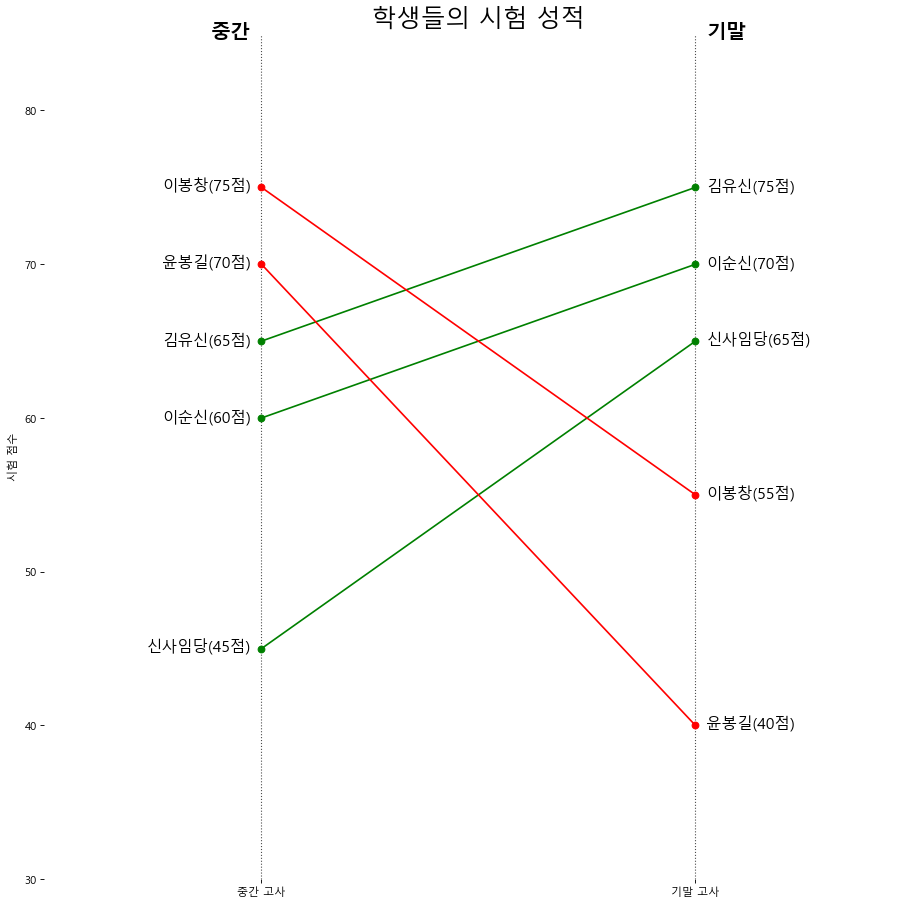

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'slopeChart'
filename = 'C:/Users/create/DV/성적.csv'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv(filename, encoding='cp949')

fig, ax = plt.subplots(1, 1, figsize=(14, 14), dpi= 80)

HUNDRED = 80 # 만점 점수
MIN_HEIGHT = 30
MAX_HEIGHT = HUNDRED + 5

# 수직선 그리기
ax.vlines(x=1, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

import numpy as np
# 각 시험 점수들에 대한 점 그리기
ax.scatter(y=df['midexam'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['finalexam'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
idx = 0

left_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['midexam'])]
print('left_label')
print(left_label)

right_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['finalexam'])]

import matplotlib.lines as mlines

# 중간 고사와 기말 고사간의 연결선을 그려 주는 함수
def newline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

for p1, p2 in zip(df['midexam'], df['finalexam']):
    newline([1, p1], [3, p2]) # 연결선을 그려 주고
    # 선들에 대한 caption 작성하기
    ax.text(1-0.05, p1, left_label[idx], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, right_label[idx], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    idx = idx + 1

# '중간'과 '기말' Annotations 작성하기
ax.text(1-0.05, HUNDRED + 5, '중간', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, HUNDRED + 5, '기말', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title('학생들의 시험 성적', fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(MIN_HEIGHT, MAX_HEIGHT), ylabel='시험 점수')

# 하단의 x축에 대한 ticks 작성
ax.set_xticks([1, 3])
ax.set_xticklabels(['중간 고사', '기말 고사'])
# plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# 그래프 영역의 테두리 선(borders) 없애기
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

# 리본 박스 그래프(참고)

주피터에서는 이미지 불러오는 기능이 없어서 실행x, 파이썬에서는 잘 실행된다   
cbook.get_sample_data("Minduka_Present_Blue_Pack.png"))   << 주피터에서는 이 문장 실행이 안됨

실습파일은 실행이 안되니 예제파일로 실습하기

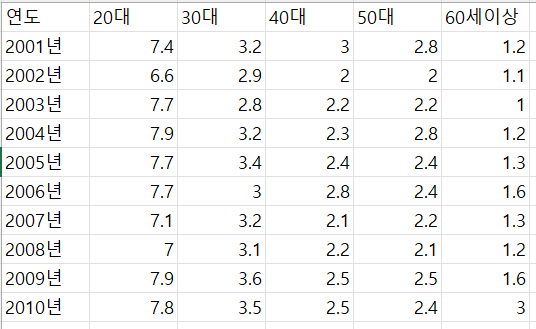

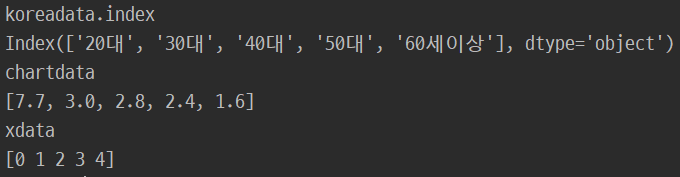

핵심 내용: 내장이 되어있는 이미지를 읽어들여서 비율을 조정하면서 그레이언트까지 색상을 지정하면서 그린 그래프

In [2]:
import numpy as np
import pandas as pd
import os
os.chdir('C:/Users/create/DV')
from matplotlib import cbook, colors as mcolors
from matplotlib.image import AxesImage
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox, TransformedBbox, BboxTransformTo
###############################################################################
plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'ribbonBox_exam'
filename = 'C:/Users/create/DV/연령별_실업율.csv'
###############################################################################
class RibbonBox:
    original_image = plt.imread(     # matplotlib에 내장된 이미지 불러오기
        cbook.get_sample_data("Minduka_Present_Blue_Pack.png"))
    cut_location = 70
    b_and_h = original_image[:, :, 2:3]
    color = original_image[:, :, 2:3] - original_image[:, :, 0:1]
    alpha = original_image[:, :, 3:4]
    nx = original_image.shape[1]

    def __init__(self, color):
        rgb = mcolors.to_rgba(color)[:3]
        self.im = np.dstack(
            [self.b_and_h - self.color * (1 - np.array(rgb)), self.alpha])

    def get_stretched_image(self, stretch_factor):
        stretch_factor = max(stretch_factor, 1)
        ny, nx, nch = self.im.shape
        ny2 = int(ny*stretch_factor)
        return np.vstack(
            [self.im[:self.cut_location],
             np.broadcast_to(
                 self.im[self.cut_location], (ny2 - ny, nx, nch)),
             self.im[self.cut_location:]])
# end class RibbonBox:

class RibbonBoxImage(AxesImage):
    zorder = 1

    def __init__(self, ax, bbox, color, *, extent=(0, 1, 0, 1), **kwargs):
        super().__init__(ax, extent=extent, **kwargs)
        self._bbox = bbox
        self._ribbonbox = RibbonBox(color)
        self.set_transform(BboxTransformTo(bbox))

    def draw(self, renderer, *args, **kwargs):
        stretch_factor = self._bbox.height / self._bbox.width

        ny = int(stretch_factor*self._ribbonbox.nx)
        if self.get_array() is None or self.get_array().shape[0] != ny:
            arr = self._ribbonbox.get_stretched_image(stretch_factor)
            self.set_array(arr)

        super().draw(renderer, *args, **kwargs)
# end class RibbonBoxImage(AxesImage):

def main():
    fig, ax = plt.subplots()

    # data = pd.read_csv(filename, index_col='국가')
    data = pd.read_csv(filename, index_col='연도', encoding='cp949')

    koreadata = data.loc['2006년', '20대':'60세이상']   # "20대':'60세이상': 20대 부터 60세이상까지의 컬럼들
    print('koreadata.index')
    print(koreadata.index)

    chartdata = [koreadata[item] for item in koreadata.index]
    print('chartdata')
    print(chartdata) # 그리고자 하는 데이터

    xdata = np.arange(0, len(chartdata))
    print('xdata')    # 2006년 컬럼의 데이터는 5개
    print(xdata)

    box_colors = [       # 데이터가 5개이까 5행
        (0.8, 0.2, 0.2),   # r, g, b
        (0.2, 0.8, 0.2),
        (0.2, 0.2, 0.8),
        (0.7, 0.5, 0.8),
        (0.3, 0.8, 0.7),
    ]

    for x, h, bc in zip(xdata, chartdata, box_colors):
        bbox0 = Bbox.from_extents(x - 0.4, 0., x + 0.4, h)
        bbox = TransformedBbox(bbox0, ax.transData)
        # 리본 이미지 넣기
        ax.add_artist(RibbonBoxImage(ax, bbox, bc, interpolation="bicubic"))
        # 상단의 수치 데이터를 콤마 유형으로 표시
        ax.annotate('%s' % format(h,','), (x, h), va="bottom", ha="center")

    ax.set_xlim(xdata[0] - 0.5, xdata[-1] + 0.5)
    ax.set_ylim(0, 10)

    myxticks = [item for item in koreadata.index]
    ax.set_xticks(xdata)
    ax.set_xticklabels(myxticks) # x축에 놓을 문자열
    ax.set_title('연령대별 실업률(2006년)')

    # 배경 색상을 지정합니다.
    background_gradient = np.zeros((2, 2, 4))   
    background_gradient[:, :, :3] = [1, 1, 0]
    background_gradient[:, :, 3] = [[0.1, 0.3], [0.3, 0.5]]  # alpha channel
    ax.imshow(background_gradient, interpolation="bicubic", zorder=0.1,    # 이미지 쇼 함수
              extent=(0, 1, 0, 1), transform=ax.transAxes, aspect="auto")

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')

    print('finished')
# end main()

main()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\create\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\Minduka_Present_Blue_Pack.png'

# 범주형 플로팅( catplot 함수 이용 )

## catplot 함수는 kind의 값에 따라 다르게 그려진다.

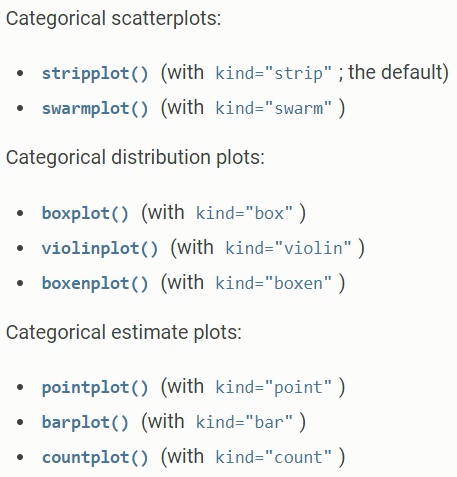

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'SpecialPlot'
filename = 'C:/Users/create/DV/welfareClean.csv'
plt.rcParams['axes.unicode_minus'] = False

welfare = pd.read_csv(filename, encoding='cp949')
print(welfare.columns)   # 컬럼이름 출력
print(welfare.head())       # 앞의 일부만 출력
################################################################################
print('범주형 플로팅')
################################################################################
fig = plt.figure(figsize=(16, 10), dpi= 80)

sns.catplot('성별', col='결혼 유무', col_wrap=3,   # 캣플롯 함수, 성별로 구분을 짓고, 컬럼을 결혼 유무로 나눈다. col_wrap: 컬럼 데이터를 3칸으로 나누겠다
                data=welfare, kind="count", height=3.5,     # (중요)kind 에 따라서 그래프가 다르게 그려진다. 여기선 countplot 함수 적용
                aspect=.8, palette='tab20')                 # aspect: 가로세로 비율.  height * aspect 하면 그래프 하나당 가로의 너비가 나온다.

fig.suptitle('제목')

# 밀도 곡선( kdeplot)

In [ ]:
print('Density Plotting')
################################################################################
filename = 'C:/Users/create/DV/welfareClean.csv'
plt.rcParams['axes.unicode_minus'] = False

welfare = pd.read_csv(filename, encoding='cp949')

print("welfare['결혼 유무'].unique()")  # 무응답, 이혼, 결혼
print(welfare['결혼 유무'].unique())   

plt.figure(figsize=(16,10), dpi= 80)      
MY_ALPHA = 0.6     # 투명도
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '무응답', '나이'], shade=True, color="r", label="무응답", alpha=MY_ALPHA)
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '이혼', '나이'], shade=True, color="g", label="이혼", alpha=MY_ALPHA)
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '결혼', '나이'], shade=True, color="b", label="결혼", alpha=MY_ALPHA)
 # kdeplot: 밀도 곡선,   shade: 색감,  label: 범례박스에서 이름

plt.title('결혼 유무에 따른 나이의 밀도 곡선', fontsize=22)
plt.legend()    # 범례박스 생성
  # 해당 데이터의 개수/전체 데이터의 개수 : density(밀도) 

# 막대사탕( Lollipop Chart) : 막대그래프+ 원그래프의 복합형 (함수는 따로x)

In [ ]:
welfare

In [ ]:
df

In [ ]:
print('Lollipop Chart')
################################################################################
filename = 'C:/Users/create/DV/welfareClean.csv'
plt.rcParams['axes.unicode_minus'] = False

welfare = pd.read_csv(filename, encoding='cp949')

df = welfare[['소득', '지역구']].groupby('지역구').apply(lambda x: x.mean())   # 소득과 지역구 컬럼 이용, 지역구 별로 그룹핑해서 
df.sort_values('소득', inplace=True)    # 평균소득으로 sort 한다(소득 순 오름차순 정렬)              # 평균을 구하는 람다함수 적용
df.reset_index(inplace=True)    

print('df')
print(df)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    # vline을 이용해서 수직선을 그린다

# 수직선
ax.vlines(x=df.index, ymin=0, ymax=df.소득, color='firebrick', alpha=0.7, linewidth=2)   # x좌표는 인덱스(0~6), ymin은 0, ymax은 df.소득 (소득의평균) 으로
                                                                                          # 컬러는 벽돌색, alpha(투명도):0.7
# 상단의 점
ax.scatter(x=df.index, y=df.소득, s=75, color='firebrick', alpha=0.7)      # 스캐터함수를 이용해서 산점도( 점 찍기) x:(0~6까지), y는 평균소득
                                                                            # s: 마커사이즈
# Title, Label, Ticks and Ylim
ax.set_title('지역구를 위한 Lollipop Chart', fontdict={'size':22})
ax.set_ylabel('소득의 평균')
ax.set_xticks(df.index)   # x축 틱을 df의 인덱스로 함 (0~6 까지)
ax.set_xticklabels(df.지역구.str.lower(), rotation=30, fontdict={'horizontalalignment': 'right', 'size':12})    
 # x축은 틱 라벨은 지역구의 이름을 소문자로 바꾸면서 각도를 30도 기울이고 'horizontalalignment': 'right' (틱을 오른쪽정렬)

# 상단에 소득의 평균을 출력해줘야 함
for row in df.itertuples():
    ax.text(row.Index, row.소득+.5, s=round(row.소득, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
      # row는 for loop에서의 변수,  위치가 x좌표가 row.index, y좌표는 평균소득+0.5,  s는 출력값 (평균값을 소숫점이하 2째자리까지)
        #  horizontalalignment= 'center', verticalalignment= 텍스트가 점에 걸리는 부분

# 정렬된 막대그래프 (Ordered Bar Chart)

In [ ]:
print('Ordered Bar Chart')
################################################################################
filename = 'C:/Users/create/DV/welfareClean.csv'
plt.rcParams['axes.unicode_minus'] = False

welfare = pd.read_csv(filename, encoding='cp949')

df = welfare[['소득', '지역구']].groupby('지역구').apply(lambda x: x.mean())    #지역구 별로 그룹핑해서 소득의 평균값을 구해 df에 저장 
df.sort_values('소득', inplace=True) # 소득에 따라서 순서를 오름차순으로 정렬  # df(평균)값을 오름차순 정렬 해서 인덱스를 부여
df.reset_index(inplace=True)

print('df')
print(df)
 
print('df.index')   
print(df.index)    # (0부터 6까지)

# Draw plot
import matplotlib.patches as patches    # 그림 그리기 위해 모듈 임포트

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.소득, color='firebrick', alpha=0.7, linewidth=20)   #(중요)linewidth 값이 커서 선이 아닌 막대모양. 롤리팝 그래프의 linewidth 값과 비교해보기
   # vline, x좌표는 인덱스(0~6), ymin은 0, ymax은 df.소득 (소득의평균) 으로  

# Annotate Text : Bar의 상단에 수치 데이터를 보여 줍니다.
for i, income in enumerate(df.소득):     # df.소득을 하나하나 돌기
    ax.text(i, income+0.5, round(income, 1), horizontalalignment='center')   # round(income, 1): 위의 그래프와 다르게 소숫점이하 첫째자리까지 나타냄
      # x좌표의 위치는 i(인덱스), y좌표의 위치는 income(값을 반올림)
        # 롤리팝 그래프에서는  for loop 변수를 row로만 설정하고 x,y 값은 row.Index, row.소득+.5 로 설정했음. 이것과 비교해보기
        
# 그래프 제목, y축 상하한선, c축 Ticks 정의
ax.set_title('Ordered Bar Chart', fontdict={'size':22})
ax.set(ylabel='지역구별 소득의 평균', ylim=(0, 301))    # ylim: y축 범위
plt.xticks(df.index, df.지역구.str.lower(), rotation=60, horizontalalignment='right', fontsize=12)   # x축 틱은 지역구이름으로 설정

# Tree Map

df
            지역구  counts
0         강원/충북     617
1  광주/전남/전북/제주도    1346
2         대구/경북     887
3         대전/충남     715
4      부산/경남/울산    1230
5            서울    1098
6           수도권    1636
labels
0            강원/충북\n (617)
1    광주/전남/전북/제주도\n (1346)
2            대구/경북\n (887)
3            대전/충남\n (715)
4        부산/경남/울산\n (1230)
5              서울\n (1098)
6             수도권\n (1636)
dtype: object
sizes
[617, 1346, 887, 715, 1230, 1098, 1636]


<AxesSubplot:>

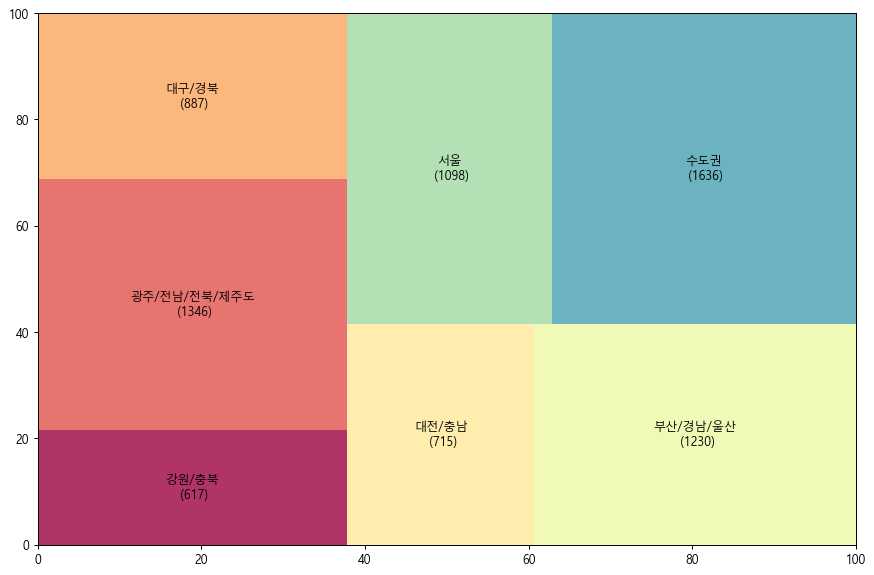

In [18]:
import squarify

filename = 'C:/Users/create/DV/welfareClean.csv'
plt.rcParams['axes.unicode_minus'] = False

welfare = pd.read_csv(filename, encoding='cp949')

df = welfare.groupby('지역구').size().reset_index(name='counts')
print('df')
print(df)

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
print('labels')
print(labels)

sizes = df['counts'].values.tolist()

print('sizes')
print(sizes)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi=88)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha= .8)

# Stem Plotting

newwelfare
0     120.0
1     220.2
2     139.0
3     150.0
4     166.0
      ...  
95    150.0
96    153.0
97     71.7
98     90.0
99    200.0
Name: 소득, Length: 100, dtype: float64


<StemContainer object of 3 artists>

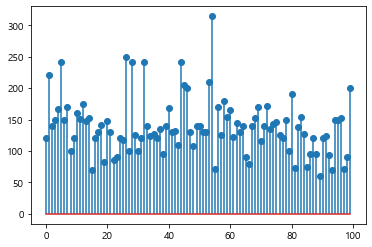

In [20]:
import numpy as np
newwelfare = welfare['소득'].head(100)

print('newwelfare')
print(newwelfare)

plt.figure()
x = np.arange(len(newwelfare))
y = np.array(newwelfare)

plt.stem(x,y)